Описание мини-проекта: анализ транзакций.

In [ ]:
# Подготовить датасет для анализа.
# Посмотреть сколько значений каждого варианта в столбце "Транзакции".
# Расчет количества успешных транзакций каждого пользователя.
# Построить гистограмму распределения количества успешных операций каждым пользователем.
# Изучить модифицированные данные. Построить сводную таблицу (колонки = names, строки = minutes,
# значения = number of transactions). 
# Построить визуализацию используя обновленные данные. Проверить есть ли в них ошибка.
# В случае обнаружения ошибки - исправить ее.

In [3]:
# Подготовка датасета:

import pandas as pd
import seaborn as sns

path = 'c:\\t_data.csv'

transactions = pd.read_csv(path)

transactions.shape

(5315, 3)

In [3]:
transactions.dtypes

date           object
name           object
transaction    object
dtype: object

In [7]:
transactions.describe().head()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
transactions.head(3)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull


In [9]:
# Расчет количества значений каждого варианта в столбце "Транзакции":

transactions.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

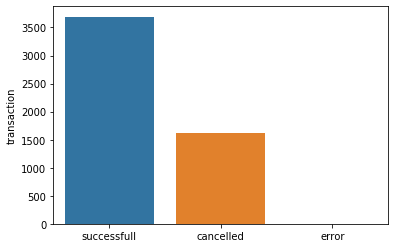

In [18]:
# Визуализация данных:

transaction_distribution = transactions.transaction.value_counts()
sns.barplot(x=transaction_distribution.index, y=transactions.transaction.value_counts())

In [15]:
# Расчет количества успешных транзакций каждого пользователя:

transactions_by_user = transactions \
                        .query('transaction == "successfull"') \
                        .groupby('name', as_index=False) \
                        .agg({'transaction': 'count'}) \
                        .rename(columns={'transaction': 'n_transactions'})
                        

transactions_by_user.head()

,name,n_transactions
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


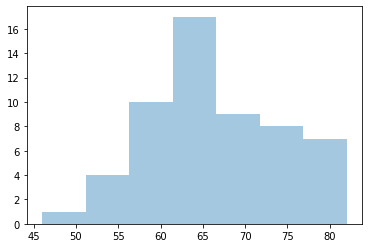

In [26]:
# Построение гистограммы распределения количества успешных операций каждым пользователем.

sns.distplot(transactions_by_user, kde=False)

In [23]:
# Построение сводной таблицы (колонки = names, строки = minutes, значения = number of transactions):

transactions2 = pd.read_csv('c:\\t2.csv')

transactions2.head(3)

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6


In [33]:
transaction_number = transactions2 \
                    .groupby(['name', 'minute'], as_index=False) \
                    .agg({'transaction': 'count'}) \
                    .rename(columns={'transaction': 'n_minutes'})

transaction_number.head()

,name,minute,n_minutes
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [41]:
customer_minutes = transaction_number \
                                    .pivot(index='minute', columns='name', values='n_minutes')
                                    

customer_minutes.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [45]:
# Заменяю NaN на 0:

customer_minutes.fillna(0, inplace=True)

customer_minutes.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


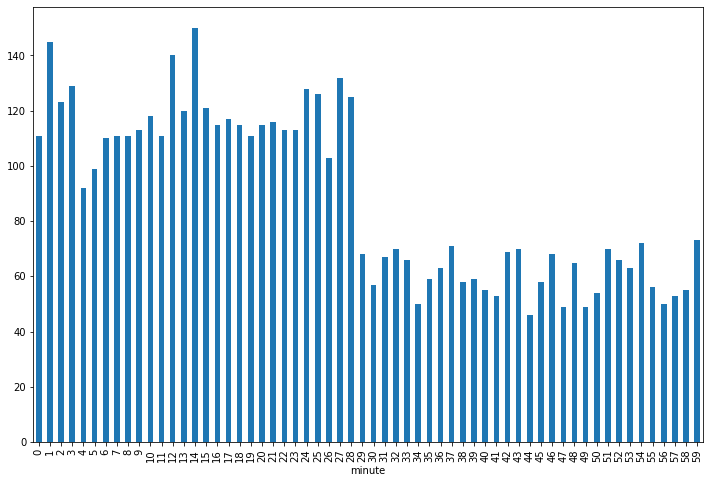

In [54]:
# Построить визуализацию используя обновленные данные. Проверить есть ли в них ошибка:

%matplotlib inline
customer_minutes.sum(axis=1).plot.bar(figsize(12,8))

In [56]:
# Определение проблемы. Проблема в том что мы смотрим только на минуты, не принимая во внимание часы:

transactions2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [57]:
# Вычисление минимального и максимального значения минут в колонке data:

transactions2.date.min()

'2020-03-02 00:00:00'

In [58]:
transactions2.date.max()

'2020-03-02 01:29:05'

In [63]:
# Решение проблемы:

transactions2['date'] = pd.to_datetime(transactions2.date)

transactions2['true_minute'] = transactions2.date.dt.minute + transactions2.date.dt.hour * 60

transactions2.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


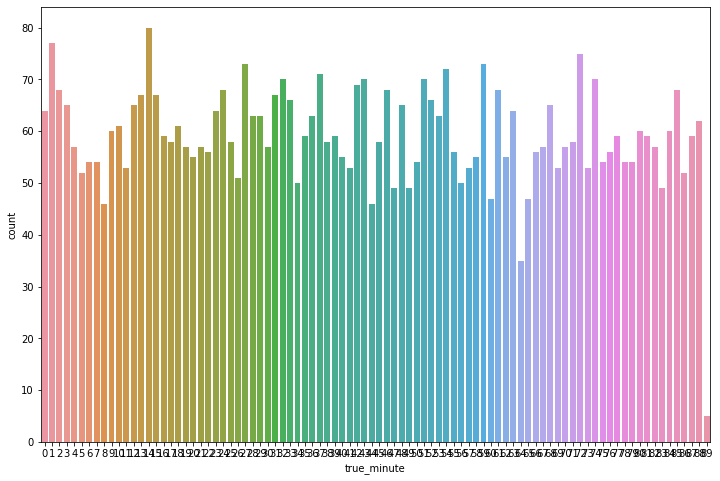

In [64]:
# Визуализация решения с помощью countplot:

sns.countplot(transactions2['true_minute'])